<a href="https://colab.research.google.com/github/songhyeonjun/Python/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_%ED%85%8C%EC%8A%AC%EB%9D%BC_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [38]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [39]:
tesla_df = pd.read_csv('/content/TSLA.csv')
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [40]:
tesla_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [41]:
tesla_df.head()

,Date,Close
0,2018-01-02,64.106003
1,2018-01-03,63.450001
2,2018-01-04,62.924000
3,2018-01-05,63.316002
4,2018-01-08,67.281998


In [42]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1082 non-null   object 
 1   Close   1082 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.0+ KB


In [77]:
tesla_train_df = tesla_df.iloc[:1077]
tesla_train_df[:1077]

,Date,Close
0,2018-01-02,64.106003
1,2018-01-03,63.450001
2,2018-01-04,62.924000
3,2018-01-05,63.316002
4,2018-01-08,67.281998
...,...,...
1072,2022-04-05,1091.260010
1073,2022-04-06,1045.760010
1074,2022-04-07,1057.260010
1075,2022-04-08,1025.489990


In [78]:
pd.to_datetime(tesla_train_df['Date'])

0      2018-01-02
1      2018-01-03
2      2018-01-04
3      2018-01-05
4      2018-01-08
          ...    
1072   2022-04-05
1073   2022-04-06
1074   2022-04-07
1075   2022-04-08
1076   2022-04-11
Name: Date, Length: 1077, dtype: datetime64[ns]

In [79]:
tesla_train_df['Date'] = pd.to_datetime(tesla_train_df['Date']) # 날짜를 datetime타입으로 변경
tesla_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1077 non-null   datetime64[ns]
 1   Close   1077 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB


In [80]:
tesla_train_df.set_index('Date', inplace=True) # index로 설정
tesla_train_df.head(2)

,Close
Date,
2018-01-02,64.106003
2018-01-03,63.450001


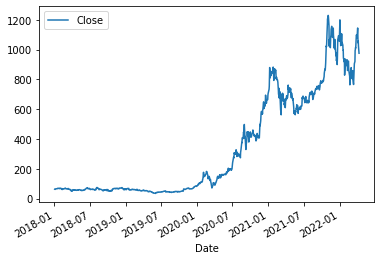

In [81]:
tesla_train_df.plot()

In [82]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [83]:
model = ARIMA(tesla_train_df.Close.values, order=(10,1,2))

In [84]:
tesla_train_df.Close[:5]

Date
2018-01-02    64.106003
2018-01-03    63.450001
2018-01-04    62.924000
2018-01-05    63.316002
2018-01-08    67.281998
Name: Close, dtype: float64

In [85]:
model_fit = model.fit(trend='c', full_output=True)

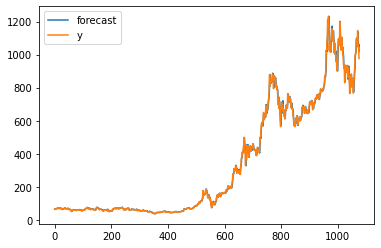

In [86]:
fig = model_fit.plot_predict()

In [87]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([971.84386912, 979.36619907, 974.83155168, 973.45395616,
        969.55043982]),
 array([18.73379317, 26.44076248, 32.01710454, 37.06339217, 41.74479449]),
 array([[ 935.12630921, 1008.56142902],
        [ 927.54325689, 1031.18914125],
        [ 912.07917989, 1037.58392347],
        [ 900.81104236, 1046.09686996],
        [ 887.73214608, 1051.36873356]]))

In [88]:
pred_y = forecast_data[0].tolist()
pred_y

[971.8438691176672,
 979.3661990746903,
 974.8315516795349,
 973.4539561605991,
 969.5504398186456]

In [89]:
tesla_test_df = tesla_df[1077:]
tesla_test_df

,Date,Close
1077,2022-04-12,986.950012
1078,2022-04-13,1022.369995
1079,2022-04-14,985.000000
1080,2022-04-18,1004.289978
1081,2022-04-19,1028.150024


In [91]:
test_y = tesla_test_df.Close.values.tolist()
test_y

[986.950012, 1022.369995, 985.0, 1004.289978, 1028.150024]

In [92]:
r2_score(test_y, pred_y)

-3.1998192498821636

In [93]:
year_1_mse = mean_squared_error(test_y, pred_y)
year_1_mse

1313.1381734241538

In [94]:
from fbprophet import Prophet

In [102]:
tesla_df_fb = pd.read_csv('/content/TSLA.csv')
tesla_df_fb

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000
...,...,...,...,...,...,...,...
1077,2022-04-12,997.640015,1021.190002,976.599976,986.950012,986.950012,21992000
1078,2022-04-13,981.080017,1026.239990,973.099976,1022.369995,1022.369995,18373700
1079,2022-04-14,999.289978,1012.710022,982.190002,985.000000,985.000000,19444000
1080,2022-04-18,989.030029,1014.919983,973.409973,1004.289978,1004.289978,17238400


In [103]:
tesla_df_fb.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [105]:
tesla_df_fb.head(2)

,Date,Close
0,2018-01-02,64.106003
1,2018-01-03,63.450001


In [108]:
tesla_df_fb.columns = ['ds', 'y']
tesla_df_fb

,ds,y
0,2018-01-02,64.106003
1,2018-01-03,63.450001
2,2018-01-04,62.924000
3,2018-01-05,63.316002
4,2018-01-08,67.281998
...,...,...
1077,2022-04-12,986.950012
1078,2022-04-13,1022.369995
1079,2022-04-14,985.000000
1080,2022-04-18,1004.289978


In [109]:
prophet = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet.fit(tesla_df_fb)

In [111]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data3 = prophet.predict(future_data)
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1082,2022-04-20,1090.324562,1054.118589,1130.599977
1083,2022-04-21,1087.330448,1048.655777,1127.595623
1084,2022-04-22,1091.668966,1052.657765,1131.264229
1085,2022-04-23,932.132825,894.791047,971.221528
1086,2022-04-24,936.322947,897.562579,973.952147


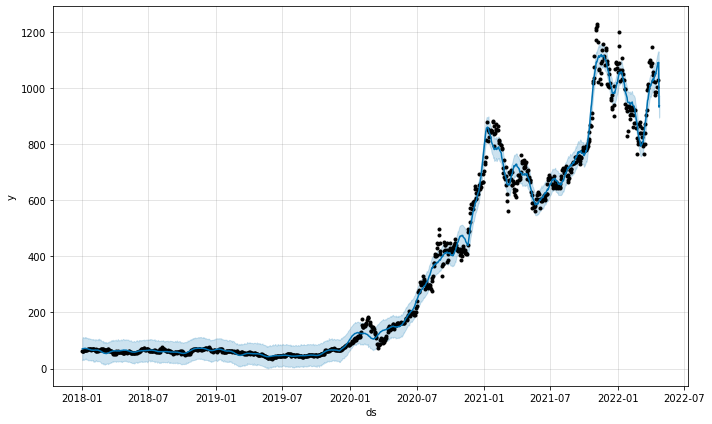

In [112]:
fig3 = prophet.plot(forecast_data3)

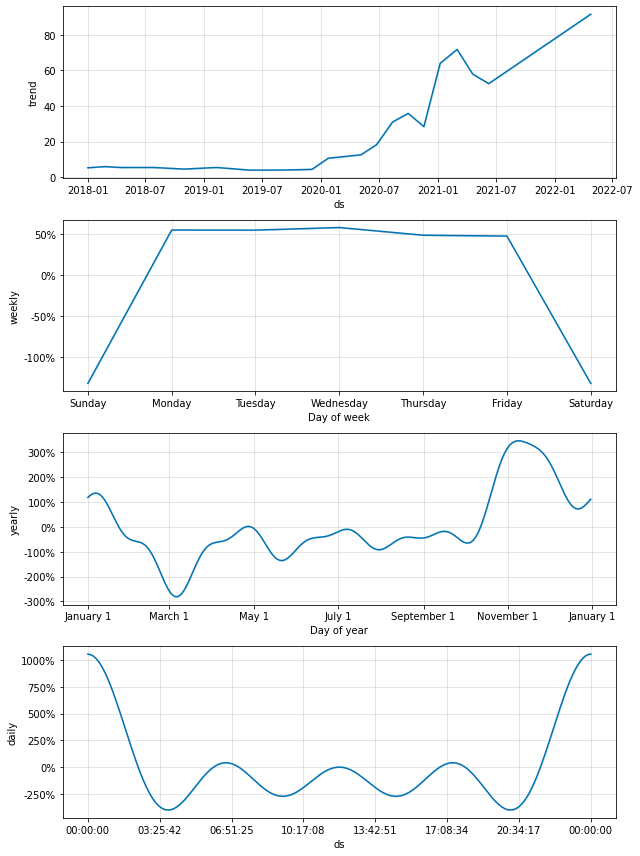

In [113]:
fig4 = prophet.plot_components(forecast_data3)

In [114]:
## mse

In [115]:
tesla_df_fb.tail(3)

,ds,y
1079,2022-04-14,985.000000
1080,2022-04-18,1004.289978
1081,2022-04-19,1028.150024


In [117]:
tesla_df_fb_train = tesla_df_fb.iloc[:1077]
tesla_df_fb_train.tail(3)

,ds,y
1074,2022-04-07,1057.260010
1075,2022-04-08,1025.489990
1076,2022-04-11,975.929993


In [120]:
tesla_df_fb_test = tesla_df_fb.iloc[1077:]
tesla_df_fb_test.tail(5)

,ds,y
1077,2022-04-12,986.950012
1078,2022-04-13,1022.369995
1079,2022-04-14,985.000000
1080,2022-04-18,1004.289978
1081,2022-04-19,1028.150024


In [122]:
tesla_df_fb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1077 non-null   object 
 1   y       1077 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.0+ KB


In [123]:
prophet2 = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
prophet2.fit(tesla_df_fb_train)

In [124]:
future_data2 = prophet2.make_future_dataframe(periods = 5, freq = 'd')
forecast_data4 = prophet.predict(future_data2)
forecast_data4[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1077,2022-04-12,1046.510641,1006.185682,1085.338299
1078,2022-04-13,1053.402264,1017.434533,1092.009787
1079,2022-04-14,1049.345537,1012.021205,1085.777635
1080,2022-04-15,1053.198105,1013.916463,1092.238896
1081,2022-04-16,895.433203,856.869546,934.433633


In [126]:
result_df_3 = pd.DataFrame({
    'day' : tesla_df_fb_test['ds'],
    'real_data' : tesla_df_fb_test['y'],
    'pred_data' : forecast_data4['yhat'].tail(5)
})
result_df_3

,day,real_data,pred_data
1077,2022-04-12,986.950012,1046.510641
1078,2022-04-13,1022.369995,1053.402264
1079,2022-04-14,985.000000,1049.345537
1080,2022-04-18,1004.289978,1053.198105
1081,2022-04-19,1028.150024,895.433203


In [127]:
pb_mse = mean_squared_error(result_df_3['real_data'], result_df_3['pred_data'])
pb_mse

5731.315553979754

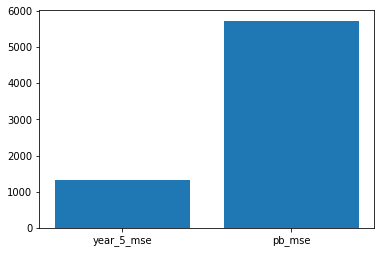

In [132]:
x = np.arange(2)
plt.bar(x, height= [
                    year_1_mse,
                    pb_mse
            ])
plt.xticks(x, ['year_5_mse', 
               'pb_mse'
               ]);